# Phase-Flip (XX) Stabilizer

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister
# Loading your IBM Q account(s)
#IBMQ.save_account('1111fdc84fb52cd6a6ae57fc29ae3166444b265152e05e051e3c5051a3891f9c278fc82caee116aac2e46be7825435a4851613049483e87e281ff4cb6ee13158')



<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## Quantum Simulator

In [2]:
## Define a two-qubit quantum circuit
q = QuantumRegister(5, 'q')
c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(q, c)

In [3]:
## Apply the quantum gates
circuit.h(q[0]);
circuit.h(q[1]);
circuit.h(q[4]);
circuit.cx(q[4],q[3]);
circuit.cx( q[4],q[2]);
circuit.h( q[2]);
circuit.h( q[3]);
circuit.h( q[4]);
circuit.measure (q[4] , c[4]);
circuit.measure (q[3] , c[3]);
circuit.measure (q[2] , c[2]);
circuit.measure (q[1] , c[1]);
circuit.measure (q[0] , c[0]);

Now we draw the circuit.
Notice that the two first qubits are just there for reference.

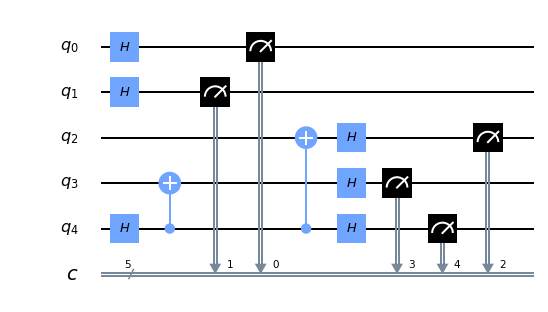

In [4]:
## Draw the circuit
%matplotlib inline
circuit.draw(output="mpl")

C:\Users\User\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


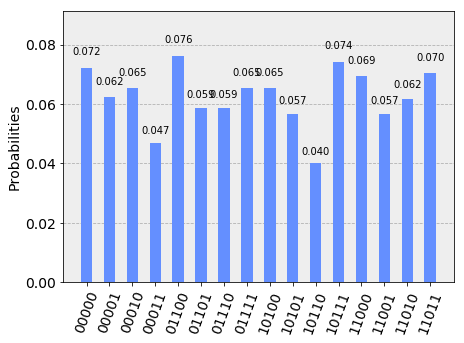

In [38]:
#IBMQ.save_account('1111fdc84fb52cd6a6ae57fc29ae3166444b265152e05e051e3c5051a3891f9c278fc82caee116aac2e46be7825435a4851613049483e87e281ff4cb6ee13158', overwrite=True)
IBMQ.load_account() # Load account from disk
from qiskit import visualization
%matplotlib inline

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')
backend_sim = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend_sim).result()
counts  = result.get_counts(circuit)


visualization.plot_histogram(counts)

The first digit (corresponds to $q_4$ at the circuit drawing) is the ancilla qubit, according to which we know if the two qubits ($q_2$ and $q_3$) share their phase. If its result is $0$ they will have the same measurement result ($00$ or $11$) and if $1$ was measured they will be different ($01$ or $10$).

## Real Quantum Device

We run the same code, only this time on a real device. In order to avoid a too-messy histigram we won't use two reference qubits as before and will only have three in the circuit.

In [5]:
## Define a two-qubit quantum circuit
q_real = QuantumRegister(3, 'q')
c_real = ClassicalRegister(3, 'c')
circuit_real = QuantumCircuit(q_real, c_real)

## Apply the quantum gates
circuit_real.h(q_real[2]);
circuit_real.cx(q_real[2],q_real[0]);
circuit_real.cx( q_real[2],q_real[1]);
for i in range (3):
    circuit_real.h(q_real[i])
circuit_real.barrier()
for i in range (3):
    circuit_real.measure(q_real[i] , c_real[i])

Now we draw the circuit.

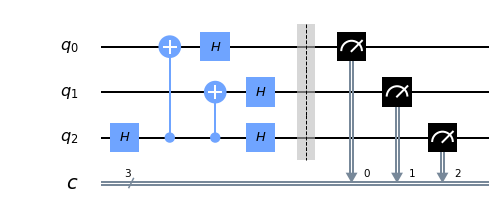

In [6]:
%matplotlib inline
circuit_real.draw(output="mpl")

We now look for the least busy IBM quantum device and execute the circuit on it. And finally plot the results.

ibmq_burlington
Job Status: job has successfully run


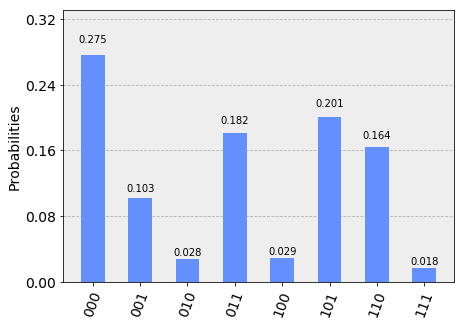

In [7]:
# Next, find the least-busy, but real, IBM device
from qiskit.providers.ibmq import least_busy
provider = IBMQ.get_provider(hub='ibm-q')
real_device = least_busy(provider.backends(simulator=False))
print(real_device)

# And run the circuit on that device
job = execute(circuit_real, backend=real_device, shots=1024)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()

from qiskit import visualization
%matplotlib inline

#backend = provider.get_backend('ibmq_qasm_simulator')
#result = execute(circuit, backend).result()
counts  = result.get_counts(circuit_real) 

# Finally, plot a histogram of the results
visualization.plot_histogram(counts)

import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

 Once again, $0$ on the ancilla qubit (first result digit) means the two qubits should have the same phase, and $1$ means they are different.